Data Preprocessing

In [12]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset 
df = pd.read_csv("/Users/rakshit/Downloads/Placement_Dataset.csv")

In [3]:
#finding the rows and column in the dataset
df.shape

(215, 15)

In [4]:
#finding the first 5 rows in the dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#missing values in the dataset
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

/var/folders/kt/d8xd4y2x62l09bchls9fn5h80000gn/T/ipykernel_84429/2995208644.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.salary)


<Axes: xlabel='salary', ylabel='Density'>

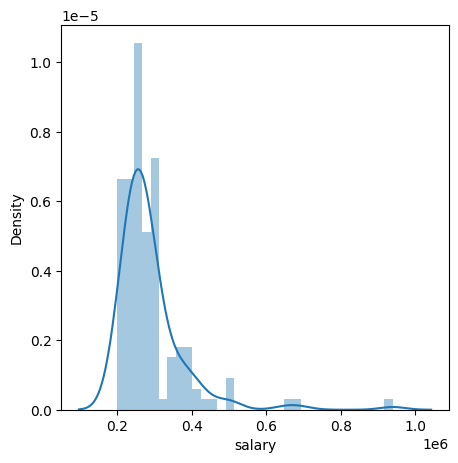

In [6]:
#visualising the salary column 
fig , ax = plt.subplots(figsize=(5,5))
sns.distplot(df.salary)

In [7]:
#filling the missing values in the salary column using median values
df["salary"].fillna(df["salary"].median(),inplace=True)

/var/folders/kt/d8xd4y2x62l09bchls9fn5h80000gn/T/ipykernel_84429/1948972877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["salary"].fillna(df["salary"].median(),inplace=True)


In [8]:
#checking missing values
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
#label encoding the values
label_encode = LabelEncoder()
df["gender_n"] = label_encode.fit_transform(df["gender"])
df["ssc_b_n"] = label_encode.fit_transform(df["ssc_b"])
df["hsc_b_n"] = label_encode.fit_transform(df["hsc_b"])
df["hsc_s_n"] = label_encode.fit_transform(df["hsc_s"])
df["degree_t_n"] = label_encode.fit_transform(df["degree_t"])
df["workex_n"] = label_encode.fit_transform(df["workex"])
df["specialisation_n"] = label_encode.fit_transform(df["specialisation"])
df["status_n"] = label_encode.fit_transform(df["status"])

In [10]:
#dropping the old columns 
df1 = df.drop(["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"],axis=1)

In [11]:
df1.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_n,ssc_b_n,hsc_b_n,hsc_s_n,degree_t_n,workex_n,specialisation_n,status_n
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,2,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,2,2,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,2,2,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,1


In [13]:
x = df1.drop(columns="status_n",axis=1)
y = df1["status_n"]

In [14]:
#standardizing the data
scaler = StandardScaler()
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [15]:
standardized_data = scaler.transform(x)
x = standardized_data

In [16]:
#splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(215, 14) (150, 14) (65, 14)
